In [2]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_csv('shootings.csv')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4895 non-null   int64  
 1   name                     4895 non-null   object 
 2   date                     4895 non-null   object 
 3   manner_of_death          4895 non-null   object 
 4   armed                    4895 non-null   object 
 5   age                      4895 non-null   float64
 6   gender                   4895 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     4895 non-null   object 
 9   state                    4895 non-null   object 
 10  signs_of_mental_illness  4895 non-null   bool   
 11  threat_level             4895 non-null   object 
 12  flee                     4895 non-null   object 
 13  body_camera              4895 non-null   bool   
 14  arms_category           

In [5]:
df.describe(include='all')

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
count,4895.000000,4895,4895,4895,4895,4895.000000,4895,4895,4895,4895,4895,4895,4895,4895,4895
unique,NaN,4851,1792,2,89,NaN,2,6,2288,51,2,3,4,2,12
top,NaN,TK TK,2018-04-01,shot,gun,NaN,M,White,Los Angeles,CA,False,attack,Not fleeing,False,Guns
freq,NaN,29,9,4647,2755,NaN,4673,2476,78,701,3792,3160,3073,4317,2764
mean,2902.148519,NaN,NaN,NaN,NaN,36.549750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1683.467910,NaN,NaN,NaN,NaN,12.694348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.000000,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1441.500000,NaN,NaN,NaN,NaN,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2847.000000,NaN,NaN,NaN,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4352.500000,NaN,NaN,NaN,NaN,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df['arms_category'].unique()

array(['Guns', 'Unarmed', 'Other unusual objects', 'Piercing objects',
       'Sharp objects', 'Unknown', 'Blunt instruments', 'Multiple',
       'Electrical devices', 'Hand tools', 'Vehicles', 'Explosives'],
      dtype=object)

The unique arms used by the vicims are 89 in number. In place of this, we could use the **armed category** of the different arms, which is 12.

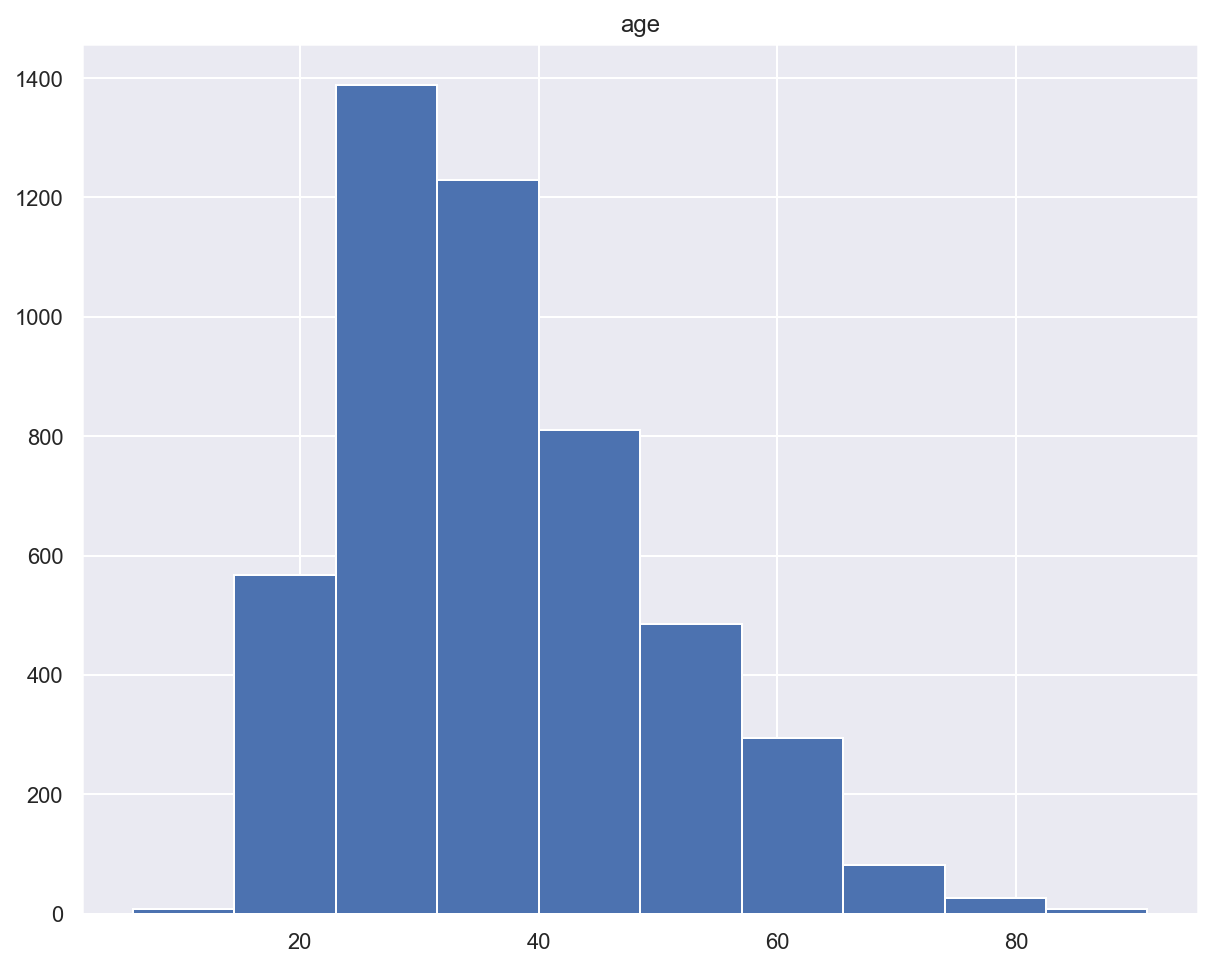

In [7]:
features = ['age']
df[features].hist(figsize=(10, 8)); #(20, 10)

From the histogram above, the `age` feature is skewed to the right. We can see that most of the victims are between the ages of 10 and 40.

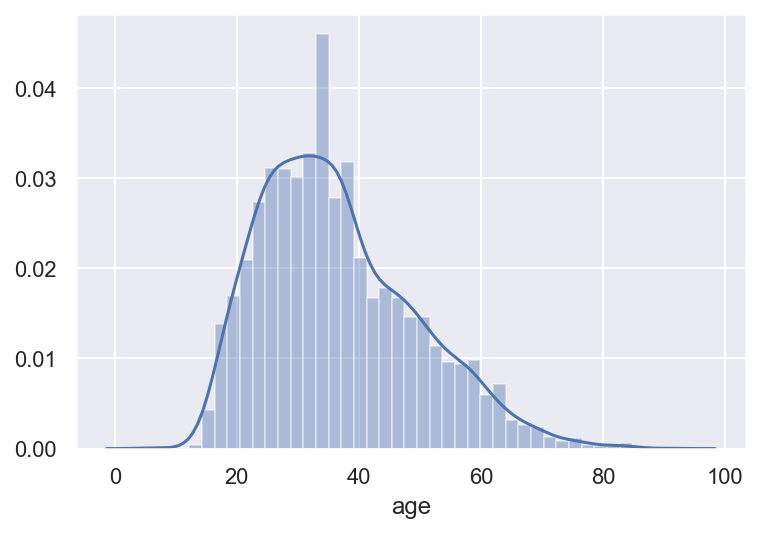

In [8]:
#kernel density estimate (KDE) plot

sns.distplot(df['age']);

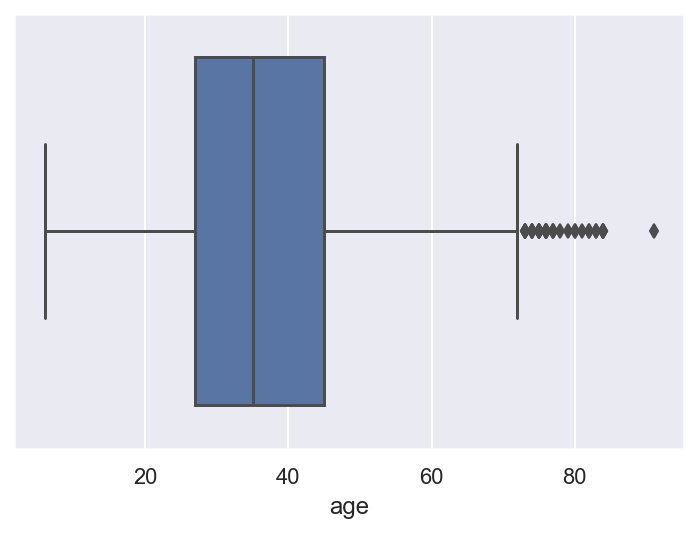

In [9]:
#what does the boxplot say?

sns.boxplot(x='age', data=df)

The boxplot also gives same insights as the histogram plot of the `age` feature. Victims whose age fall between 72 and 100 are rare in the dataset. 

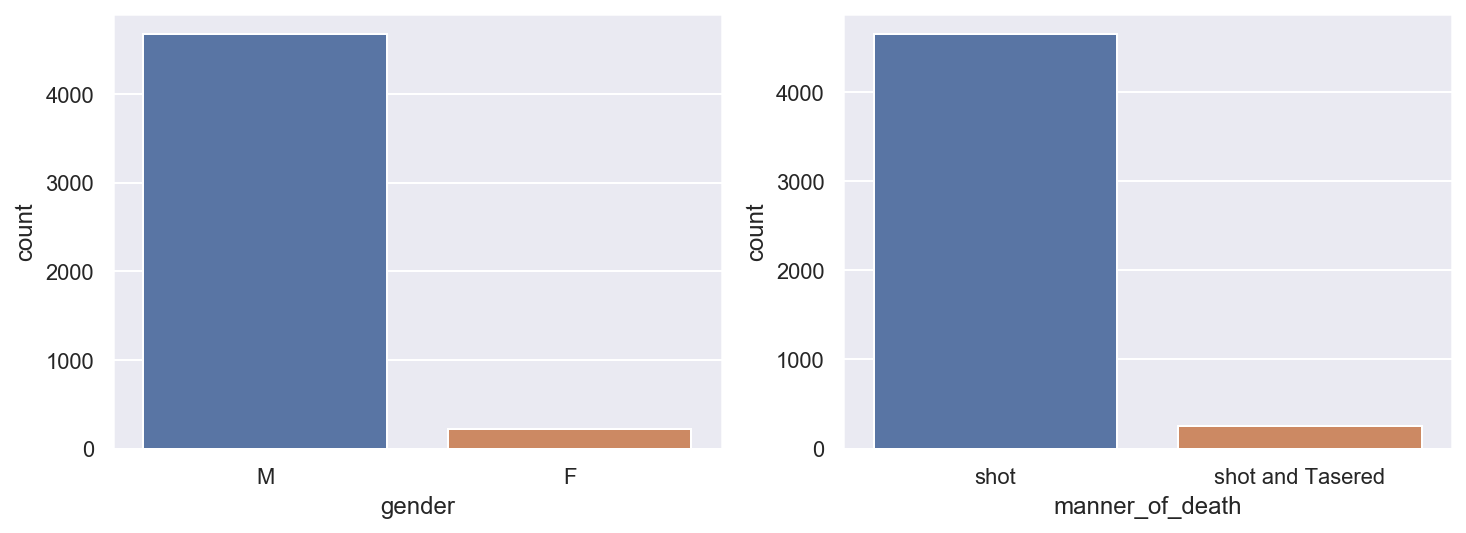

In [10]:
# Bar plot

_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='gender', data=df, ax=axes[0]);
sns.countplot(x='manner_of_death', data=df, ax=axes[1]);

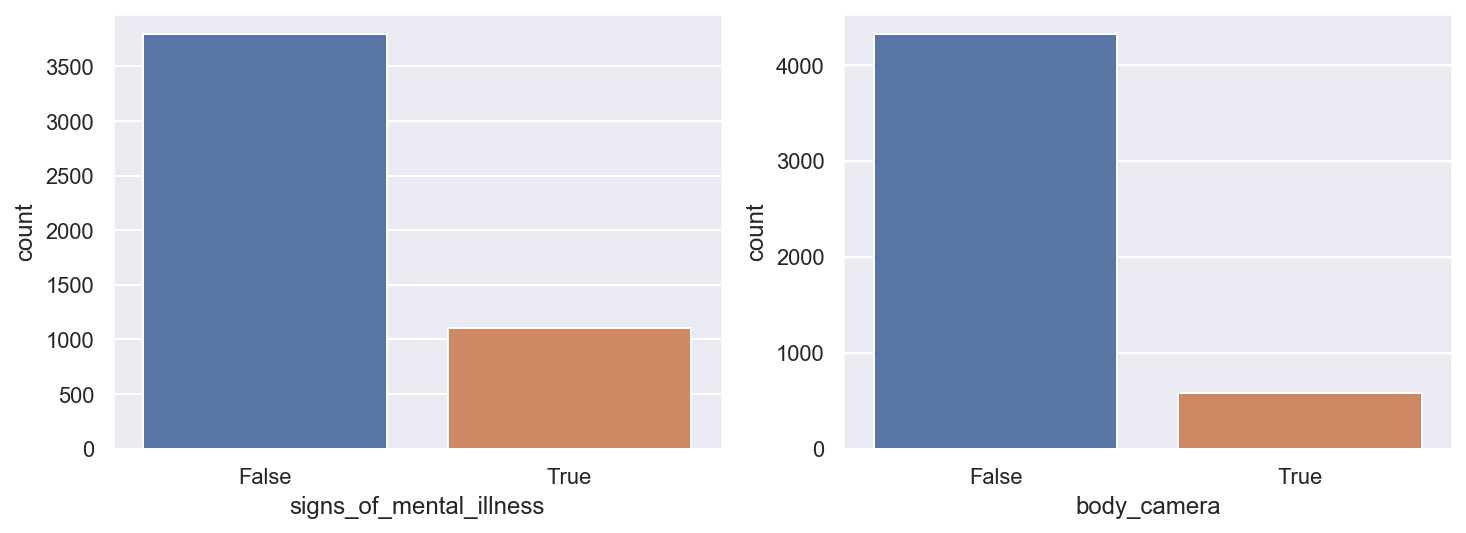

In [11]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='signs_of_mental_illness', data=df, ax=axes[0]);
sns.countplot(x='body_camera', data=df, ax=axes[1]);

Quite a large number of the victims are **male**. In most cases, they didn't show signs of mental illness. This bags a question, "why was the incident not recorded in many scenarios?"

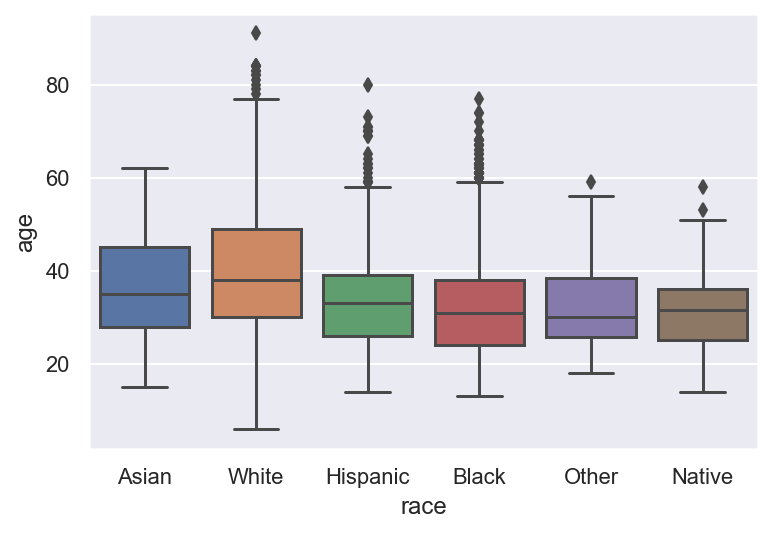

In [12]:
sns.boxplot(x='race', y='age', data=df);

The boxplot above shows that a large number of the victims are of the **White** `race`, followed by those of the **Black** and **Hispanic** `race` respectively.

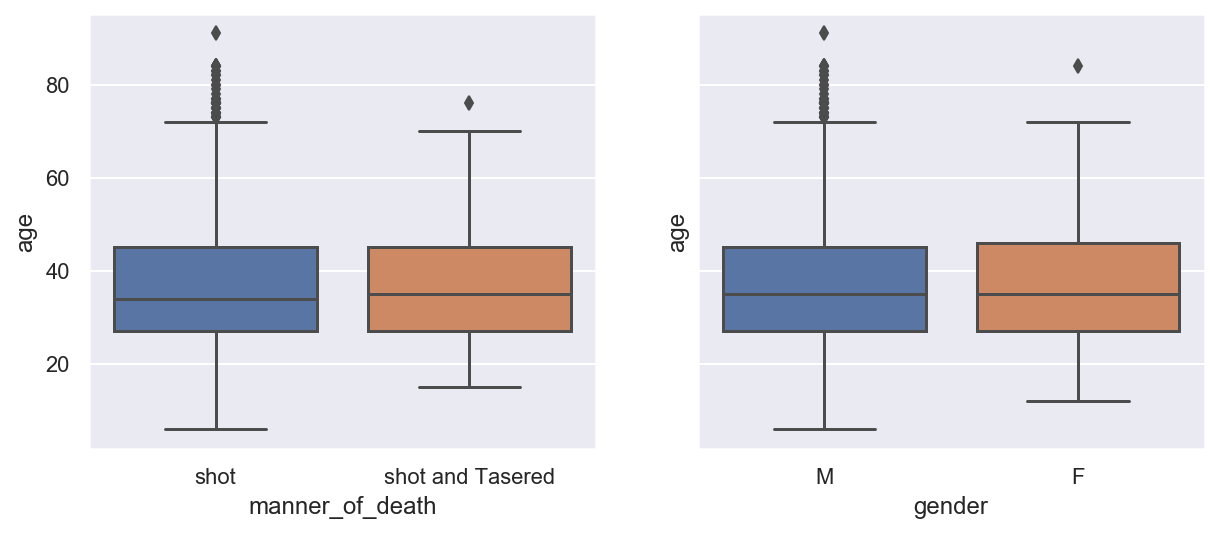

In [13]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x='manner_of_death', y='age', data=df, ax=axes[0]);
sns.boxplot(x='gender', y='age', data=df, ax=axes[1]);

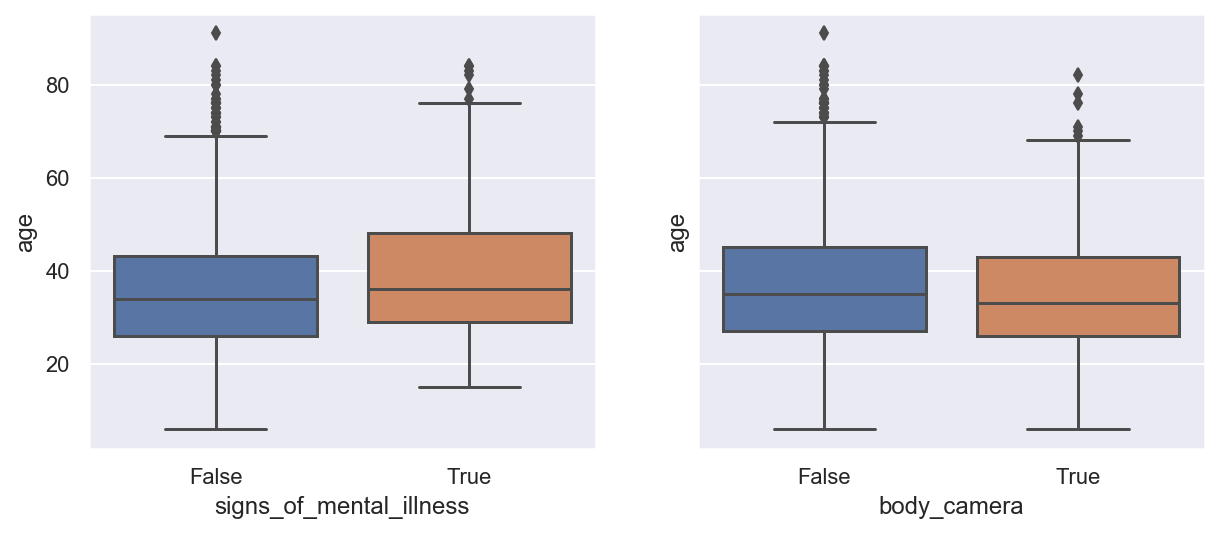

In [14]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x='signs_of_mental_illness', y='age', data=df, ax=axes[0]);
sns.boxplot(x='body_camera', y='age', data=df, ax=axes[1]);

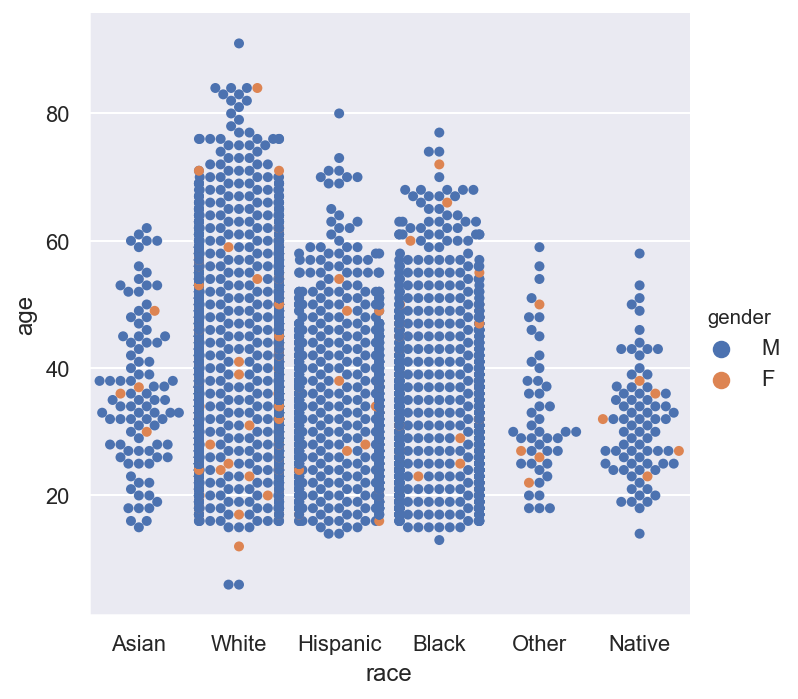

In [15]:
sns.catplot(x='race', y='age', hue="gender",kind="swarm", data=df);

Victims of the **White** `race` cuts across all age grades in the dataset. There is also an evenly distribution of male and female victims from the different races. 

**Observation**: Irrespective of the victims' gender and race, the rate of shootings was the same.

In [16]:
df['threat_level'].unique()

array(['attack', 'other', 'undetermined'], dtype=object)

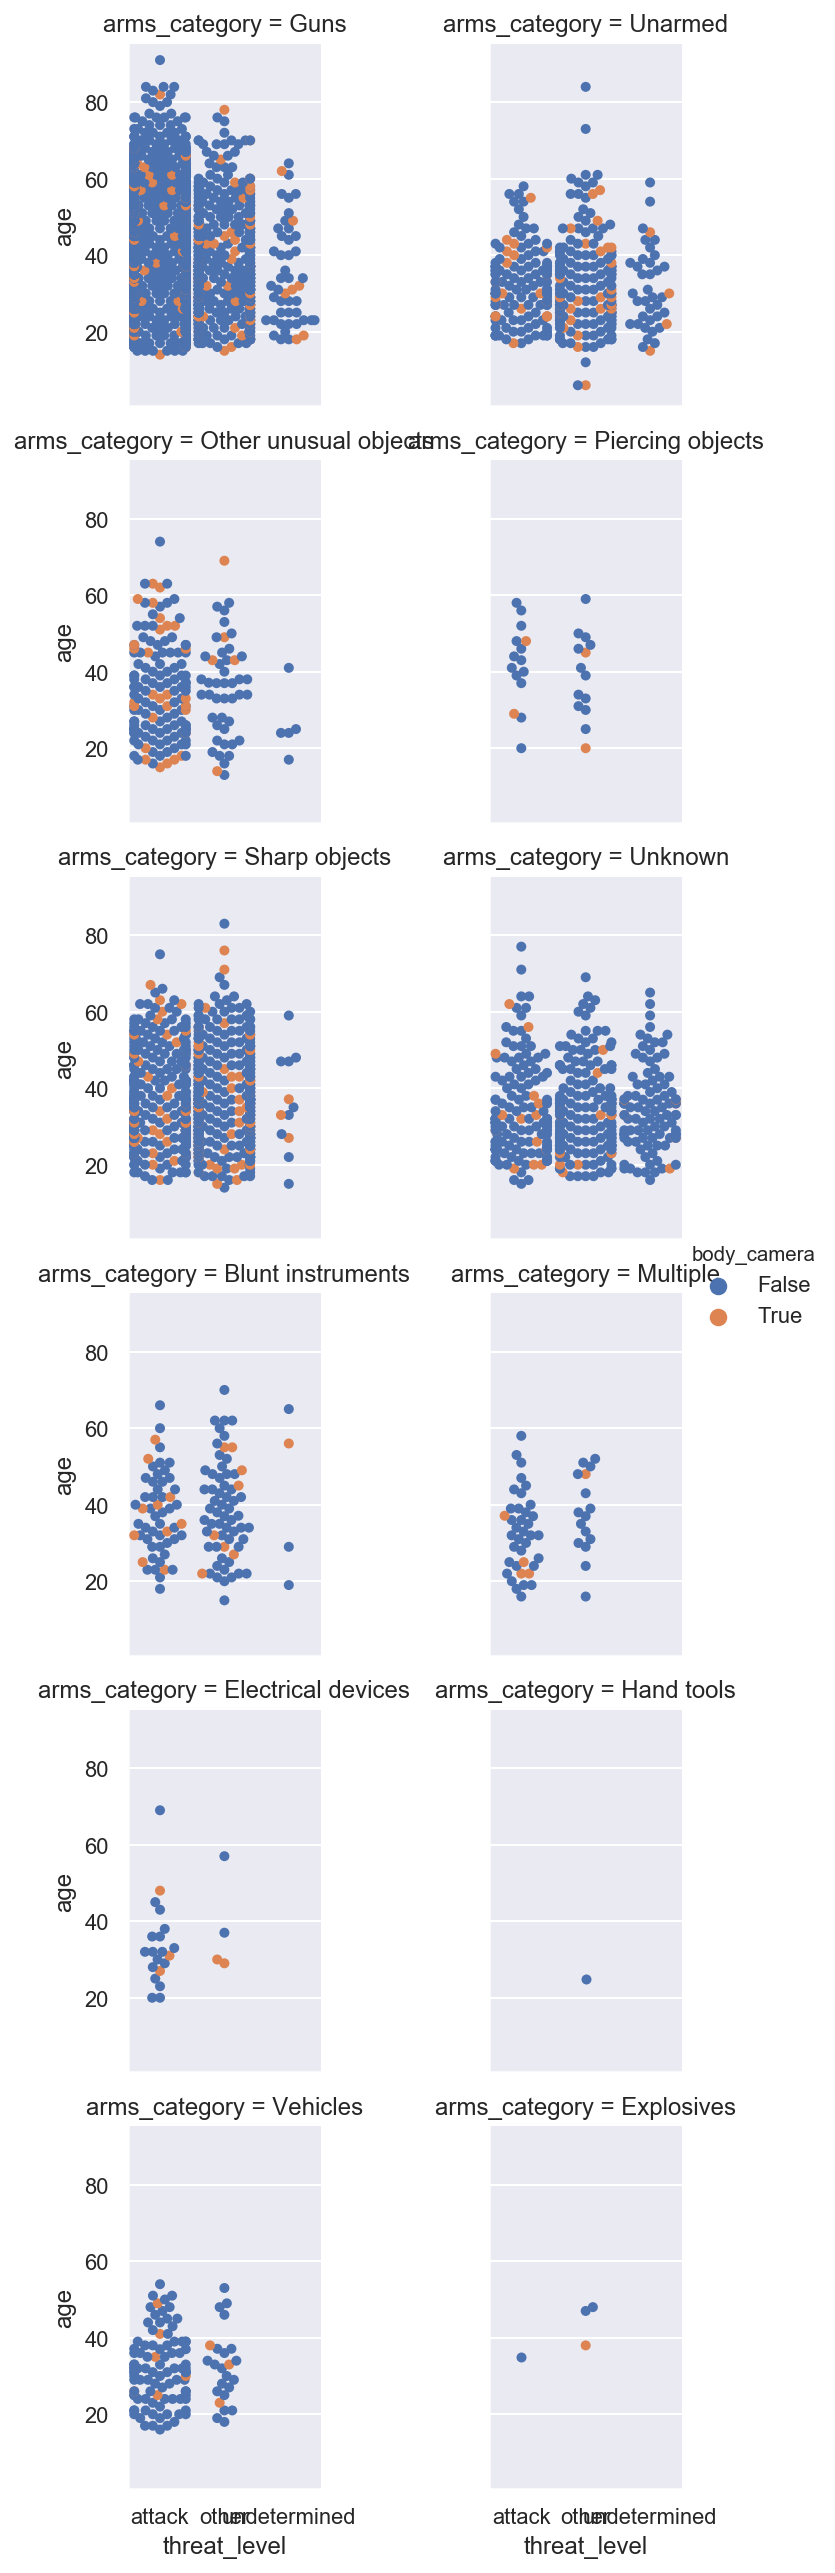

In [16]:
sns.catplot(x='threat_level', y='age', hue="body_camera",col="arms_category",
               kind="swarm", col_wrap=2, height=3, aspect=.8, data=df);

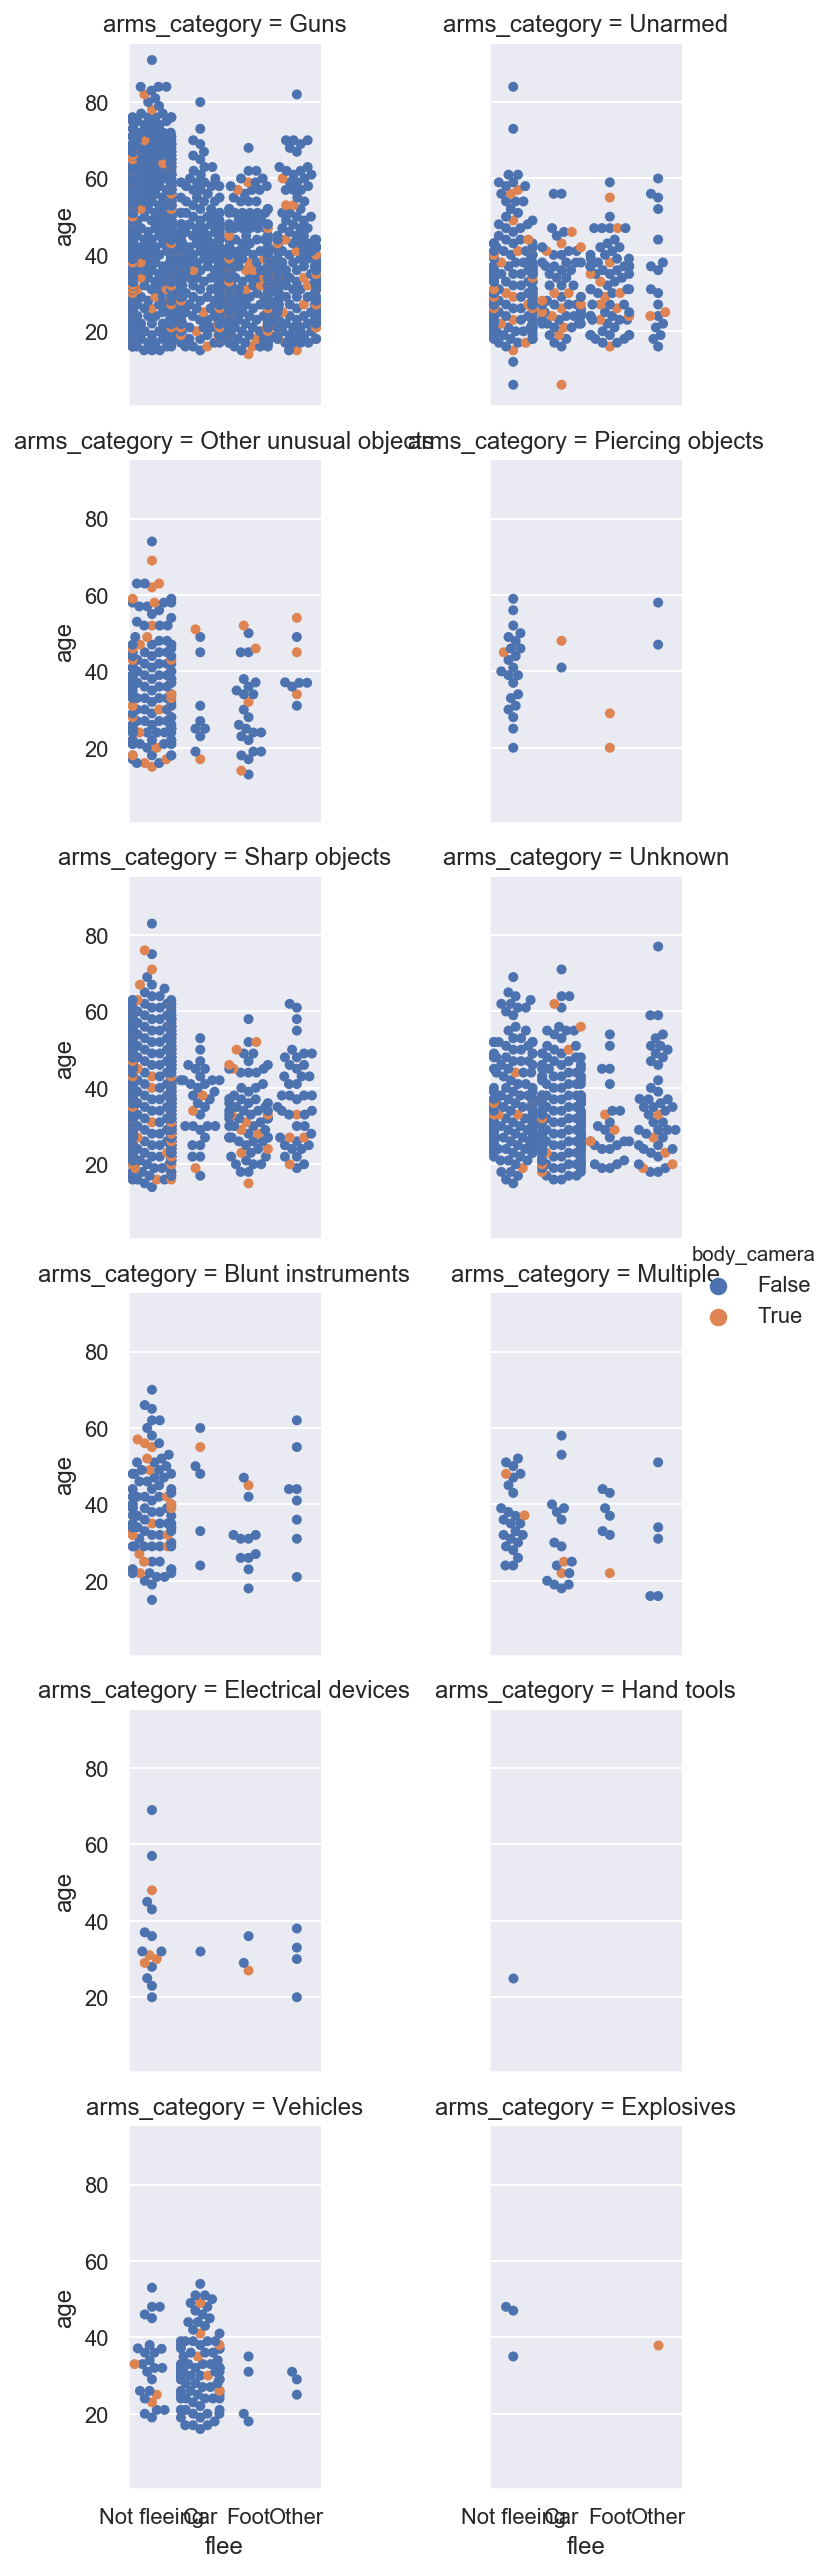

In [17]:
sns.catplot(x='flee', y='age', hue="body_camera",col="arms_category",
               kind="swarm", col_wrap=2, height=3, aspect=.8, data=df);

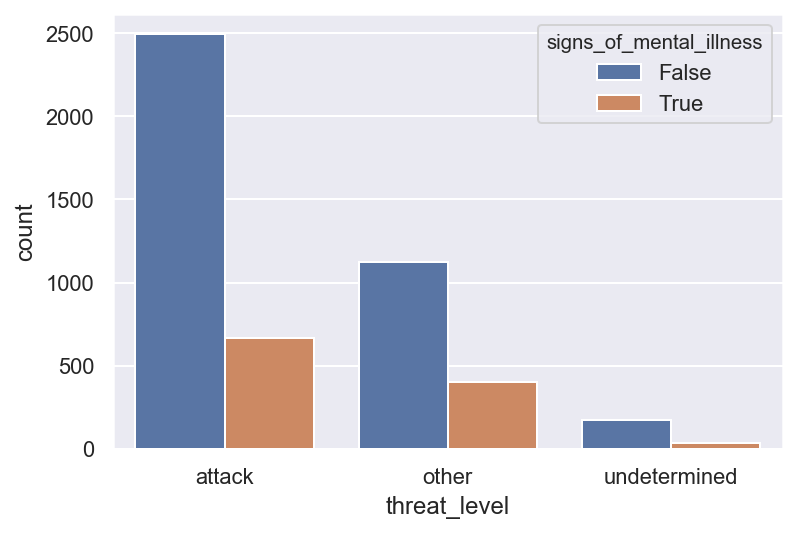

In [25]:
sns.countplot(x='threat_level', hue='signs_of_mental_illness', data=df);

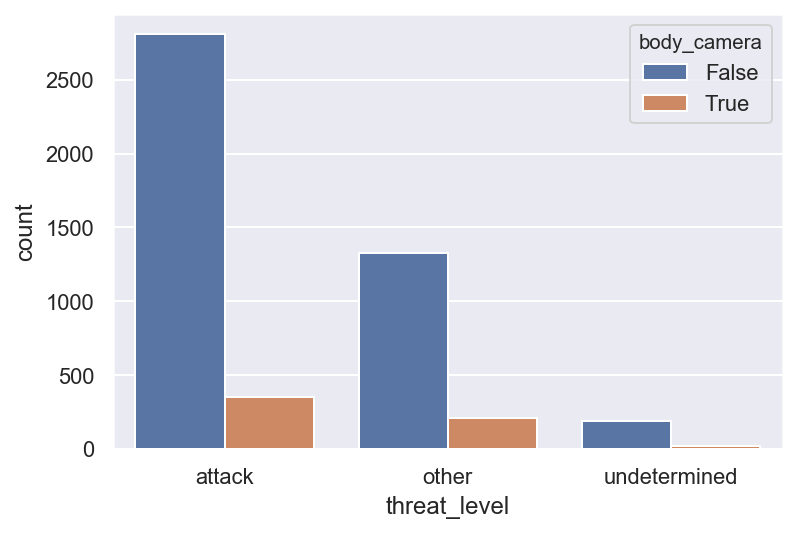

In [26]:
sns.countplot(x='threat_level', hue='body_camera', data=df);

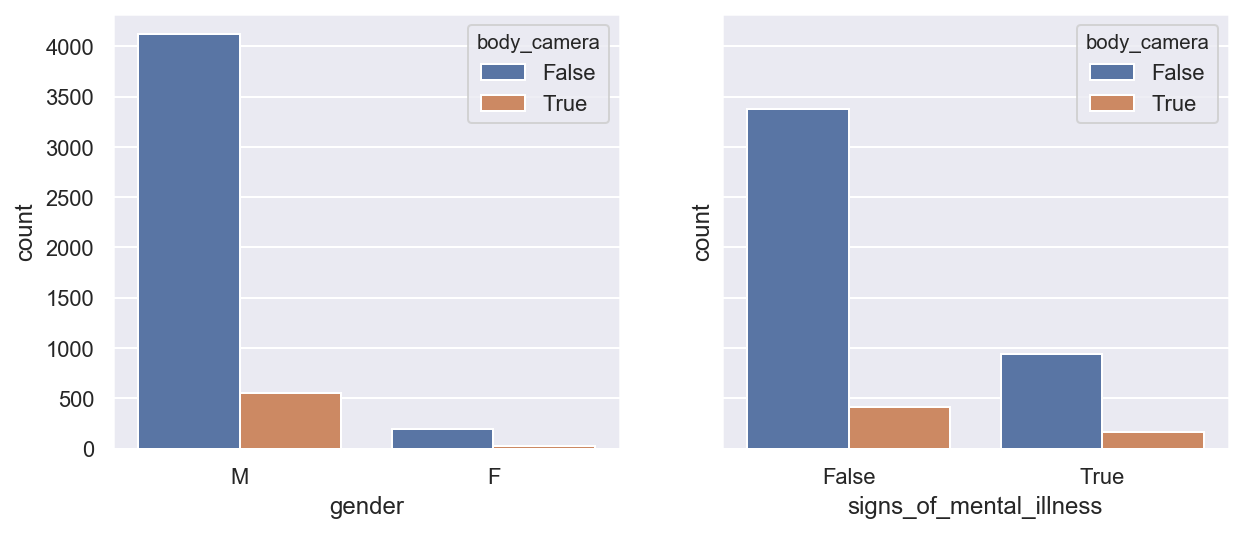

In [28]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x='gender', hue='body_camera', data=df, ax=axes[0]);
sns.countplot(x='signs_of_mental_illness', hue='body_camera', data=df, ax=axes[1]);

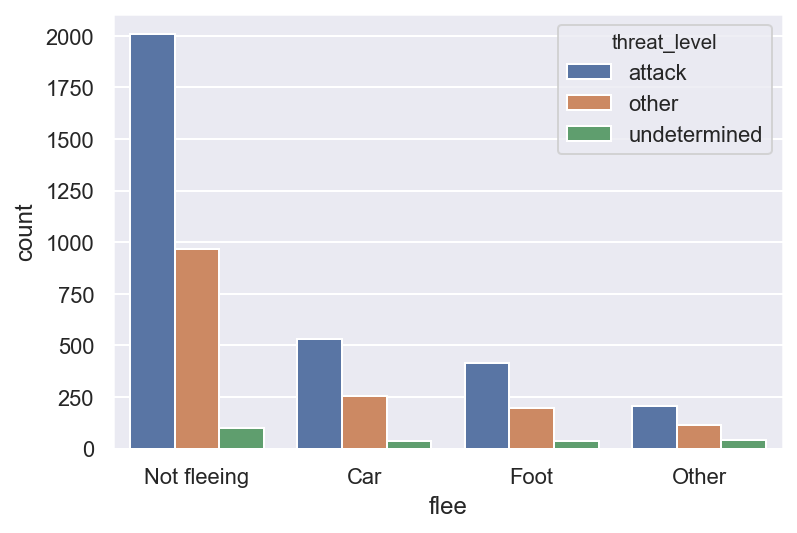

In [20]:
sns.countplot(x='flee', hue='threat_level', data=df);

# Conclusion

We can conclude that irrespective of the victims' gender and race, the rate of shootings was the same. 

Incidents that involved the use of guns recorded the highest number of victims. Most of the victims in this group did not flee, but attacked the Police. 

In most cases where the body camera was turned off, the victims did not show signs of mental illness.